
Número de registos e atributos:
Registos: 165
Atributos: 50


Atributos: ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 'Class']


Atributos e tipo de registos (não atualizado):
Gender            object
Symptoms          object
Alcohol           object
HBsAg             object
HBeAg             object
HBcAb             object
HCVAb             object
Cirrhosis         object
Endemic           object
Smoking           object
Diabetes          object
Obesity           object
Hemochro          object
AHT               object
CRI               obje

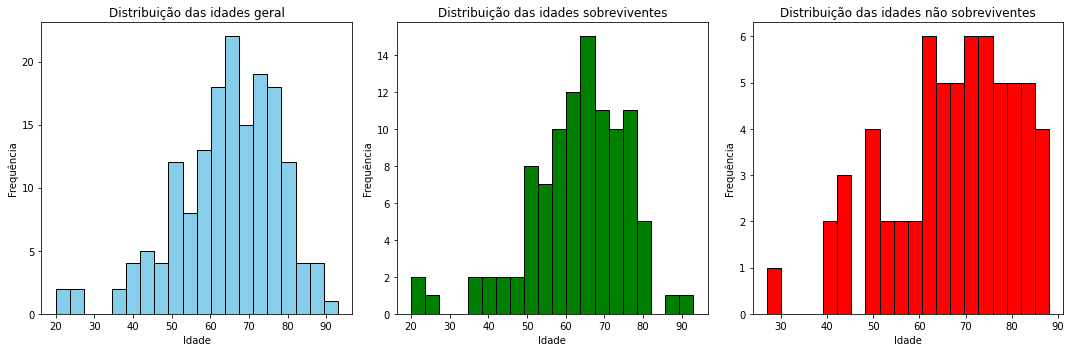

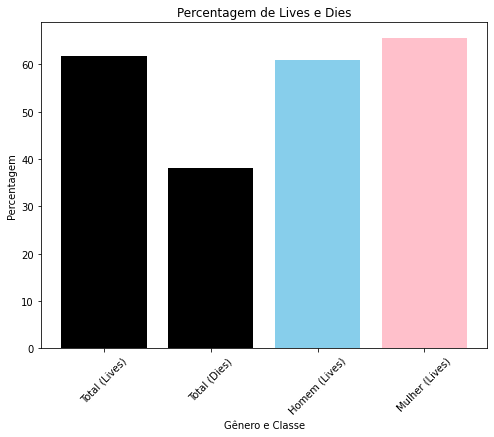

C:\Users\Pedro Figueiredo\AppData\Local\Temp\ipykernel_9712\2331235593.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[atributo]=enc.fit_transform(df[atributo])
C:\Users\Pedro Figueiredo\AppData\Local\Temp\ipykernel_9712\2331235593.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[atributos_categoricos]=imputer.fit_transform(df[atributos_categoricos])



dataset só com valores numéricos e sem missing values:
     Gender  Symptoms  Alcohol  HBsAg  HBcAb  HCVAb  Cirrhosis  Diabetes  \
0       1.0       1.0      1.0    1.0    1.0    1.0        1.0       2.0   
1       0.0       0.0      0.0    1.0    1.0    2.0        1.0       2.0   
2       1.0       1.0      1.0    2.0    2.0    1.0        1.0       1.0   
3       1.0       2.0      1.0    1.0    1.0    1.0        1.0       2.0   
4       1.0       2.0      1.0    2.0    2.0    1.0        1.0       1.0   
..      ...       ...      ...    ...    ...    ...        ...       ...   
160     0.0       1.0      1.0    0.0    0.0    2.0        1.0       1.0   
161     0.0       2.0      0.0    0.0    0.0    0.0        1.0       1.0   
162     1.0       1.0      1.0    1.0    1.0    1.0        1.0       2.0   
163     1.0       1.0      1.0    2.0    2.0    2.0        1.0       1.0   
164     1.0       2.0      1.0    1.0    1.0    2.0        1.0       1.0   

     Obesity  Hemochro  ...    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# ANÁLISE E LIMPEZA DOS DADOS

# Importar dataset a ser utilizado
ds = pd.read_csv('hcc_dataset.csv', sep=",") 

# Sobre atributos e registos
print()
print("Número de registos e atributos:")
print("Registos:", ds.shape[0])                                                                    # quantidade de linhas
print("Atributos:", ds.shape[1])                                                                    # quantidade de colunas
print()

# Retirar lista dos atributos que estão em análise
print()
print("Atributos:", list(ds.columns))                                                               # lista de atributos do dataset
print()

# Tipos de dados em cada atributo, este método apresentava os float como object
print()
print("Atributos e tipo de registos (não atualizado):")
print(ds.dtypes)
print()


# Atualização para se tornarem floats, retirar os dados númericos e atualizar (falta arranjar um método que resolva isto)
atributos_numericos = [
    'Age', 'Grams_day', 'Packs_year', 'PS', 'INR', 'AFP', 'Hemoglobin', 'MCV',
    'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP',
    'TP', 'Creatinine', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin'
]

atributos_categoricos = [
    'Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis',
    'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 
    'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Encephalopathy',
    'Ascites', 'Nodules']

atributos=atributos_numericos+atributos_categoricos

for atributo in atributos_numericos:
    ds[atributo] = pd.to_numeric(ds[atributo], errors='coerce')

'''for atributo in atributos_numericos:
    ds.loc[ds[atributo]=='?',atributo]=float('NaN')
for atributo in atributos_categoricos:
    ds.loc[ds[atributo]=='?',atributo]=float('NaN')'''

# Atributos e registos
print()
print("Atributos e tipo de registo:")
print(ds.dtypes)
print()


# Quantidade de missing values e percentagem em relação aos registos totais
total_question = (ds == '?').sum()
total_records = ds.shape[0]
percentagem = round((total_question / total_records) * 100)
result_df = pd.DataFrame({'Missing values': total_question,
    'Percentagem de missing values': percentagem})

# Imprimir o DataFrame resultante
print()
print("Quantidade de missing values e percentagem em relação ao total de registos por atributo")
print(result_df)

# Filtrar os atributos com percentagem maior que 20%
indices_a_selecionar = percentagem[percentagem < 20].index

# Remover os atributos do DataFrame que tenham poucos registos
df = ds[indices_a_selecionar]

# Quantidade de missing values e percentagem em relação aos registos totais
total_question = (df == '?').sum()
total_records = df.shape[0]
percentagem = round((total_question / total_records) * 100)
result_df = pd.DataFrame({'Missing values': total_question,
    'Percentagem de missing values': percentagem})

# Imprimir o DataFrame resultante
print()
print("Quantidade de missing values e percentagem em relação ao total de registos por atributo - atualizado")
print(result_df)

#atualizar lista atributos numéricos e categóricos
atributos_numericos=[x for x in atributos_numericos if x in df.columns]
atributos_categoricos=[x for x in atributos_categoricos if x in df.columns]
atributos=atributos_numericos+atributos_categoricos
print('atributos numéricos atualizados:',atributos_numericos)

# Quantidade de missing values nos atributos numericos e percentagem em relação aos registos totais
total_question = (df[atributos_numericos] == '?').sum()
total_records = df.shape[0]
percentagem = round((total_question / total_records) * 100)
result_df = pd.DataFrame({'Missing values': total_question,
    'Percentagem de missing values': percentagem})

# Imprimir o DataFrame resultante
print()
print("Quantidade de missing values nos atributos numericos e percentagem em relação ao total de registos por atributo - atualizado")
print(result_df)


#transformar valores None em 0
for atributo in atributos_numericos:
    df.loc[df[atributo].isnull()==True,atributo]=0

#verificar que já não existem valores NaN
print()
print('número de valores NaN:')
print(df.isnull().sum())

# Verificar duplicados
duplicados = df.duplicated().sum()
print("Total de duplicados:", duplicados)


# Casos específicos que podem ser utilizados para análise
df_male = df[df['Gender'] == 'Male']                                                                # dataset apenas de homens
df_female = df[df['Gender'] == 'Female']                                                            # dataset apenas de mulheres
df_dies = df[df['Class'] == 'Dies']                                                                 # dataset de Dies
df_lives = df[df['Class'] == 'Lives']                                                               # dataset de Lives

 
# Função que retorna a quantidade de respostas para um atributo
def respostas(atributo):
    valor=df[atributo].value_counts()
    print('Respostas do atributo: ' + str(valor))

print()
print(respostas('Alcohol'))
print()
print(respostas('Cirrhosis'))
print()

# Análise das respostas dos que morreram a cada atributo
def respostasD(atributo):
    valor=df_dies[atributo].value_counts()
    print('Respostas em casos de morte no atributo: ' + str(valor))

print()
print(respostasD('Alcohol'))
print()
print(respostasD('Cirrhosis'))
print()

# Análise das respostas dos que viveram a cada atributo
def respostasL(atributo):
    valor=df_lives[atributo].value_counts()
    print('Respostas em casos de sobrevivência no atributo: ' + str(valor))

print()
print(respostasL('Alcohol'))
print()
print(respostasL('Cirrhosis'))
print()


# Médias, desvio-padrão e medidas estatísticas sobre os dados

print('Sobre o dataset em geral')
print(df.describe())
print()
print('Sobre os lives')
print(df_lives.describe())
print()
print('Sobre os dies')
print(df_dies.describe())
print()


# Gráficos das idades, idades dos que viveram e idades dos que morreram
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Distribuição das idades geral')

axs[1].hist(df_lives['Age'], bins=20, color='green', edgecolor='black')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Distribuição das idades sobreviventes')

axs[2].hist(df_dies['Age'], bins=20, color='red', edgecolor='black')
axs[2].set_xlabel('Idade')
axs[2].set_ylabel('Frequência')
axs[2].set_title('Distribuição das idades não sobreviventes')

plt.tight_layout()

plt.show()

# Contagem de Lives e Dies
total_lives = df[df['Class'] == 'Lives'].shape[0]
total_dies = df[df['Class'] == 'Dies'].shape[0]
total_homens= df_male.shape[0]
total_mulheres=df_female.shape[0]

# Percentagens em relação ao total geral
percent_lives_total = (total_lives / total_records) * 100
percent_dies_total = (total_dies / total_records) * 100

# Contagem de Lives por gênero
total_lives_homens = df[(df['Class'] == 'Lives') & (df['Gender'] == 'Male')].shape[0]
total_lives_mulheres = df[(df['Class'] == 'Lives') & (df['Gender'] == 'Female')].shape[0]

# Percentagens de Lives por gênero
percent_lives_homens = (total_lives_homens / total_homens) * 100
percent_lives_mulheres = (total_lives_mulheres / total_mulheres) * 100

# Criar o gráfico de barras com as percentagens
categorias = ['Total (Lives)', 'Total (Dies)', 'Homem (Lives)', 'Mulher (Lives)']
percentagens = [percent_lives_total, percent_dies_total, percent_lives_homens, percent_lives_mulheres]

plt.figure(figsize=(8, 6))
plt.bar(categorias, percentagens, color=['black', 'black', 'skyblue', 'pink'])
plt.xlabel('Gênero e Classe')
plt.ylabel('Percentagem')
plt.title('Percentagem de Lives e Dies')
plt.xticks(rotation=45)
plt.show()

#codificaçao de variáveis categóricas
enc=preprocessing.LabelEncoder()
mask=df!='?'
df_cat=df.copy()
for atributo in atributos_categoricos:
    df[atributo]=enc.fit_transform(df[atributo])
df.where(mask)

#substituiçao dos missing values utilizando k-Nearest Neighbors
imputer = KNNImputer(missing_values=float('NaN'),n_neighbors=1)
df_com_missing_values=df.copy()
df[atributos_categoricos]=imputer.fit_transform(df[atributos_categoricos])
print()
print('dataset só com valores numéricos e sem missing values:')
print(df)

#eliminar atributos sem variância
for atributo in atributos:
    if df[atributo].std()==0:
        df=df.drop(columns=atributo)
        atributos_numericos.remove(atributo) #atualizar lista dos atributos
        atributos.remove(atributo) #atualizar lista dos atributos
        print('O atributo '+atributo+' foi removido por ter variãncia nula.')

#remoçao de atributos correlacionados
corr_df=abs(df.corr())
mask=np.triu(np.full((len(corr_df), len(corr_df)), True, dtype=bool))
tri_df=corr_df.mask(mask)
to_drop=[c for c in tri_df.columns if any(tri_df[c]>0.95)]
df.drop(columns=to_drop)
for atributo in to_drop:
    atributos_numericos.remove(atributo) #atualizar lista dos atributos
    atributos.remove(atributo) #atualizar lista dos atributos
    print('O atributo '+atributo+' foi removido por estar correlacionado com outro atributo')
        
#ÁRVORE DE DECISÃO
X=df[atributos] #atributos
Y=df['Class'] #classe
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y) #divisão dos dados entre teste e treino
clf=DecisionTreeClassifier(max_leaf_nodes=5,criterion='gini',random_state=0)
clf.fit(X_train,Y_train)
Y_pred_X_train=clf.predict(X_train)
mortes_previstas=Y_pred_X_train=='Dies'
vidas_previstas=Y_pred_X_train=='Lives'
comp=Y_pred_X_train==Y_train.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Utilizando uma árvore de decisão:')
print()
print('Matriz de confusão, com o modelo aplicado nos dados de treino:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)

Y_pred_X_test=clf.predict(X_test)
mortes_previstas=Y_pred_X_test=='Dies'
vidas_previstas=Y_pred_X_test=='Lives'
comp=Y_pred_X_test==Y_test.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Matriz de confusão, com o modelo aplicado nos dados de teste:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)

#normalizar os dados

norm_df=(df[atributos]-df[atributos].mean())/df[atributos].std()
print()
print('Dados depois de normalizados:')
print(norm_df.describe())

#VIZINHOS MAIS PRÓXIMOS
X=norm_df #atributos
Y=df['Class'] #classe
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y) #divisão dos dados entre teste e treino
clf=sklearn.neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)
Y_pred_X_train=clf.predict(X_train)
mortes_previstas=Y_pred_X_train=='Dies'
vidas_previstas=Y_pred_X_train=='Lives'
comp=Y_pred_X_train==Y_train.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Utilizando o método dos vizinhos mais próximos:')
print()
print('Matriz de confusão, com o modelo aplicado nos dados de treino:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)

Y_pred_X_test=clf.predict(X_test)
mortes_previstas=Y_pred_X_test=='Dies'
vidas_previstas=Y_pred_X_test=='Lives'
comp=Y_pred_X_test==Y_test.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Matriz de confusão, com o modelo aplicado nos dados de teste:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)

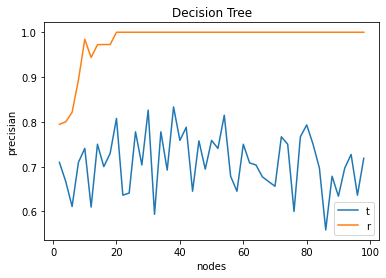

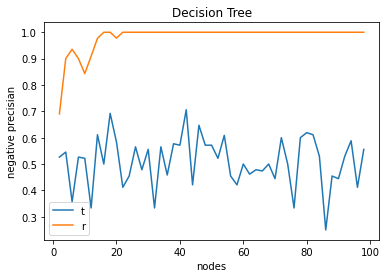

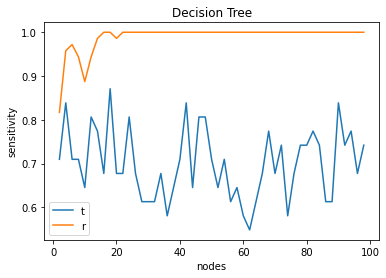

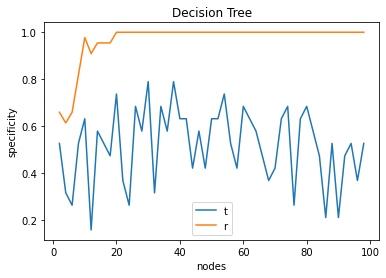

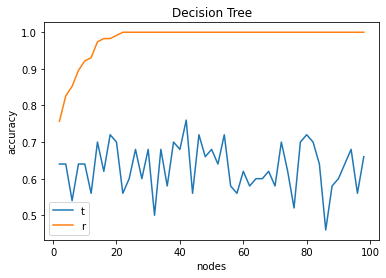

In [33]:
precisian_train=[]
negative_precisian_train=[]
sensitivity_train=[]
specificity_train=[]
accuracy_train=[]
precisian_test=[]
negative_precisian_test=[]
sensitivity_test=[]
specificity_test=[]
accuracy_test=[]
for i in range(2,100,2):
    #ÁRVORE DE DECISÃO
    X=df[atributos] #atributos
    Y=df['Class'] #classe
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y) #divisão dos dados entre teste e treino
    clf=DecisionTreeClassifier(max_leaf_nodes=i,criterion='gini',random_state=0)
    clf.fit(X_train,Y_train)
    Y_pred_X_train=clf.predict(X_train)
    mortes_previstas=Y_pred_X_train=='Dies'
    vidas_previstas=Y_pred_X_train=='Lives'
    comp=Y_pred_X_train==Y_train.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_train.append(precisian)
    negative_precisian_train.append(negative_precisian)
    sensitivity_train.append(sensitivity)
    specificity_train.append(specifity)
    accuracy_train.append(accuracy)

    Y_pred_X_test=clf.predict(X_test)
    mortes_previstas=Y_pred_X_test=='Dies'
    vidas_previstas=Y_pred_X_test=='Lives'
    comp=Y_pred_X_test==Y_test.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_test.append(precisian)
    negative_precisian_test.append(negative_precisian)
    sensitivity_test.append(sensitivity)
    specificity_test.append(specifity)
    accuracy_test.append(accuracy)

nodos=np.arange(2,100,2)

plt.plot(nodos,precisian_test)
plt.legend('test')
plt.plot(nodos,precisian_train)
plt.legend('train')
plt.xlabel('nodes')
plt.ylabel('precisian')
plt.title('Decision Tree')
plt.show()

plt.plot(nodos,negative_precisian_test)
plt.legend('test')
plt.plot(nodos,negative_precisian_train)
plt.legend('train')
plt.xlabel('nodes')
plt.ylabel('negative precisian')
plt.title('Decision Tree')
plt.show()

plt.plot(nodos,sensitivity_test)
plt.legend('test')
plt.plot(nodos,sensitivity_train)
plt.legend('train')
plt.xlabel('nodes')
plt.ylabel('sensitivity')
plt.title('Decision Tree')
plt.show()

plt.plot(nodos,specificity_test)
plt.legend('test')
plt.plot(nodos,specificity_train)
plt.legend('train')
plt.xlabel('nodes')
plt.ylabel('specificity')
plt.title('Decision Tree')
plt.show()

plt.plot(nodos,accuracy_test)
plt.legend('test')
plt.plot(nodos,accuracy_train)
plt.legend('train')
plt.xlabel('nodes')
plt.ylabel('accuracy')
plt.title('Decision Tree')
plt.show()



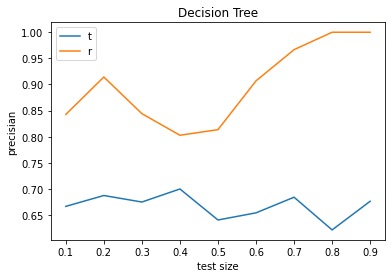

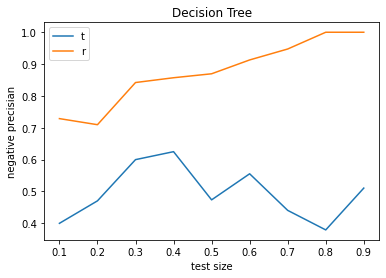

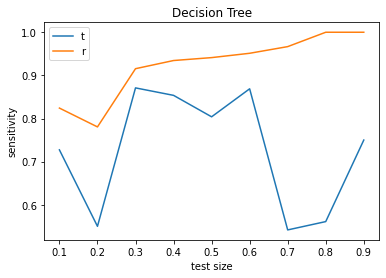

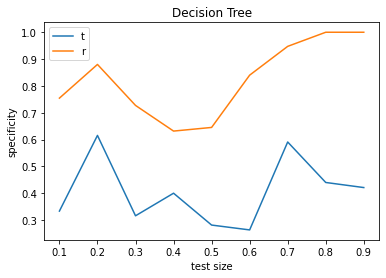

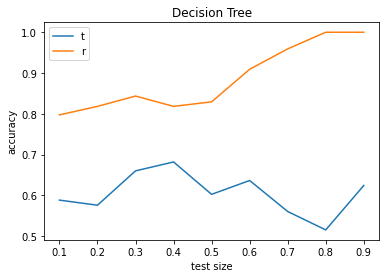

In [27]:
precisian_train=[]
negative_precisian_train=[]
sensitivity_train=[]
specificity_train=[]
accuracy_train=[]
precisian_test=[]
negative_precisian_test=[]
sensitivity_test=[]
specificity_test=[]
accuracy_test=[]
for i in np.linspace(0.1,0.9,9):
    #ÁRVORE DE DECISÃO
    X=df[atributos] #atributos
    Y=df['Class'] #classe
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=i,stratify=Y) #divisão dos dados entre teste e treino
    clf=DecisionTreeClassifier(max_leaf_nodes=5,criterion='gini',random_state=0)
    clf.fit(X_train,Y_train)
    Y_pred_X_train=clf.predict(X_train)
    mortes_previstas=Y_pred_X_train=='Dies'
    vidas_previstas=Y_pred_X_train=='Lives'
    comp=Y_pred_X_train==Y_train.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_train.append(precisian)
    negative_precisian_train.append(negative_precisian)
    sensitivity_train.append(sensitivity)
    specificity_train.append(specifity)
    accuracy_train.append(accuracy)

    Y_pred_X_test=clf.predict(X_test)
    mortes_previstas=Y_pred_X_test=='Dies'
    vidas_previstas=Y_pred_X_test=='Lives'
    comp=Y_pred_X_test==Y_test.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_test.append(precisian)
    negative_precisian_test.append(negative_precisian)
    sensitivity_test.append(sensitivity)
    specificity_test.append(specifity)
    accuracy_test.append(accuracy)

test_size=np.linspace(0.1,0.9,9)

plt.plot(test_size,precisian_test)
plt.legend('test')
plt.plot(test_size,precisian_train)
plt.legend('train')
plt.xlabel('test size')
plt.ylabel('precisian')
plt.title('Decision Tree')
plt.show()

plt.plot(test_size,negative_precisian_test)
plt.legend('test')
plt.plot(test_size,negative_precisian_train)
plt.legend('train')
plt.xlabel('test size')
plt.ylabel('negative precisian')
plt.title('Decision Tree')
plt.show()

plt.plot(test_size,sensitivity_test)
plt.legend('test')
plt.plot(test_size,sensitivity_train)
plt.legend('train')
plt.xlabel('test size')
plt.ylabel('sensitivity')
plt.title('Decision Tree')
plt.show()

plt.plot(test_size,specificity_test)
plt.legend('test')
plt.plot(test_size,specificity_train)
plt.legend('train')
plt.xlabel('test size')
plt.ylabel('specificity')
plt.title('Decision Tree')
plt.show()

plt.plot(test_size,accuracy_test)
plt.legend('test')
plt.plot(test_size,accuracy_train)
plt.legend('train')
plt.xlabel('test size')
plt.ylabel('accuracy')
plt.title('Decision Tree')
plt.show()



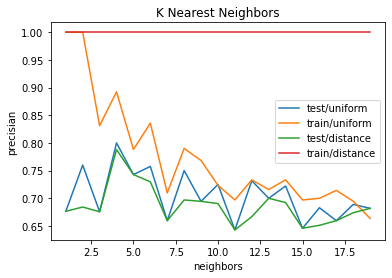

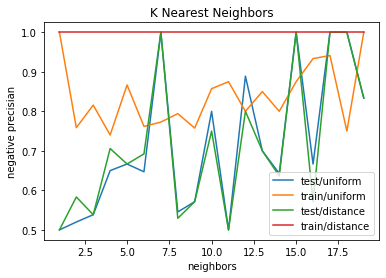

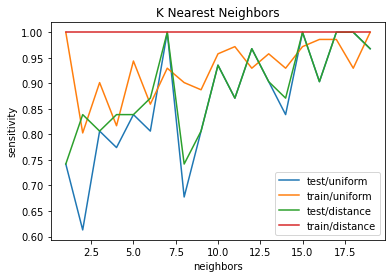

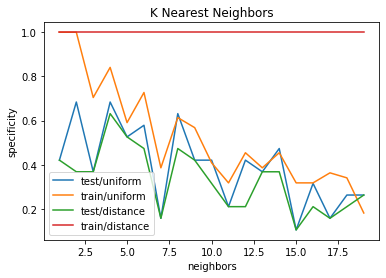

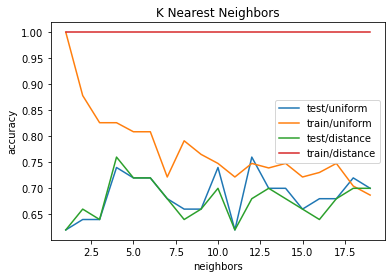

In [26]:
precisian_train=[]
negative_precisian_train=[]
sensitivity_train=[]
specificity_train=[]
accuracy_train=[]
precisian_test=[]
negative_precisian_test=[]
sensitivity_test=[]
specificity_test=[]
accuracy_test=[]
precisian_train_d=[]
negative_precisian_train_d=[]
sensitivity_train_d=[]
specificity_train_d=[]
accuracy_train_d=[]
precisian_test_d=[]
negative_precisian_test_d=[]
sensitivity_test_d=[]
specificity_test_d=[]
accuracy_test_d=[]

for i in range(1,20):

    #VIZINHOS MAIS PRÓXIMOS
    X=norm_df #atributos
    Y=df['Class'] #classe
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y) #divisão dos dados entre teste e treino
    
    clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,Y_train)
    Y_pred_X_train=clf.predict(X_train)
    mortes_previstas=Y_pred_X_train=='Dies'
    vidas_previstas=Y_pred_X_train=='Lives'
    comp=Y_pred_X_train==Y_train.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_train.append(precisian)
    negative_precisian_train.append(negative_precisian)
    sensitivity_train.append(sensitivity)
    specificity_train.append(specifity)
    accuracy_train.append(accuracy)

    Y_pred_X_test=clf.predict(X_test)
    mortes_previstas=Y_pred_X_test=='Dies'
    vidas_previstas=Y_pred_X_test=='Lives'
    comp=Y_pred_X_test==Y_test.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_test.append(precisian)
    negative_precisian_test.append(negative_precisian)
    sensitivity_test.append(sensitivity)
    specificity_test.append(specifity)
    accuracy_test.append(accuracy)
    
    clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance')
    clf.fit(X_train,Y_train)
    Y_pred_X_train=clf.predict(X_train)
    mortes_previstas=Y_pred_X_train=='Dies'
    vidas_previstas=Y_pred_X_train=='Lives'
    comp=Y_pred_X_train==Y_train.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_train_d.append(precisian)
    negative_precisian_train_d.append(negative_precisian)
    sensitivity_train_d.append(sensitivity)
    specificity_train_d.append(specifity)
    accuracy_train_d.append(accuracy)

    Y_pred_X_test=clf.predict(X_test)
    mortes_previstas=Y_pred_X_test=='Dies'
    vidas_previstas=Y_pred_X_test=='Lives'
    comp=Y_pred_X_test==Y_test.values
    TP=sum(vidas_previstas&comp)
    FP=sum(vidas_previstas)-TP
    TN=sum(mortes_previstas&comp)
    FN=sum(mortes_previstas)-TN
    precisian=TP/(TP+FP)
    negative_precisian=TN/(TN+FN)
    sensitivity=TP/(TP+FN)
    specifity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precisian_test_d.append(precisian)
    negative_precisian_test_d.append(negative_precisian)
    sensitivity_test_d.append(sensitivity)
    specificity_test_d.append(specifity)
    accuracy_test_d.append(accuracy)


vizinhos=np.arange(1,20)
plt.plot(vizinhos,precisian_test,label='test/uniform')
plt.plot(vizinhos,precisian_train,label='train/uniform')
plt.plot(vizinhos,precisian_test_d,label='test/distance')
plt.plot(vizinhos,precisian_train_d,label='train/distance')
plt.xlabel('neighbors')
plt.ylabel('precisian')
plt.legend()
plt.title('K Nearest Neighbors')
plt.show()

plt.plot(vizinhos,negative_precisian_test,label='test/uniform')
plt.plot(vizinhos,negative_precisian_train,label='train/uniform')
plt.plot(vizinhos,negative_precisian_test_d,label='test/distance')
plt.plot(vizinhos,negative_precisian_train_d,label='train/distance')
plt.xlabel('neighbors')
plt.ylabel('negative precisian')
plt.legend()
plt.title('K Nearest Neighbors')
plt.show()

plt.plot(vizinhos,sensitivity_test,label='test/uniform')
plt.plot(vizinhos,sensitivity_train,label='train/uniform')
plt.plot(vizinhos,sensitivity_test_d,label='test/distance')
plt.plot(vizinhos,sensitivity_train_d,label='train/distance')
plt.legend('train/distance')
plt.xlabel('neighbors')
plt.ylabel('sensitivity')
plt.legend()
plt.title('K Nearest Neighbors')
plt.show()

plt.plot(vizinhos,specificity_test,label='test/uniform')
plt.plot(vizinhos,specificity_train,label='train/uniform')
plt.plot(vizinhos,specificity_test_d,label='test/distance')
plt.plot(vizinhos,specificity_train_d,label='train/distance')
plt.legend('train/distance')
plt.xlabel('neighbors')
plt.ylabel('specificity')
plt.legend()
plt.title('K Nearest Neighbors')
plt.show()

plt.plot(vizinhos,accuracy_test,label='test/uniform')
plt.plot(vizinhos,accuracy_train,label='train/uniform')
plt.plot(vizinhos,accuracy_test_d,label='test/distance')
plt.plot(vizinhos,accuracy_train_d,label='train/distance')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.title('K Nearest Neighbors')
plt.show()


In [35]:
#ÁRVORE DE DECISÃO
X=df[atributos] #atributos
Y=df['Class'] #classe
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y) #divisão dos dados entre teste e treino
clf=DecisionTreeClassifier(max_leaf_nodes=5,criterion='gini',random_state=0)
clf.fit(X_train,Y_train)
Y_pred_X_train=clf.predict(X_train)
mortes_previstas=Y_pred_X_train=='Dies'
vidas_previstas=Y_pred_X_train=='Lives'
comp=Y_pred_X_train==Y_train.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Utilizando uma árvore de decisão:')
print()
print('Matriz de confusão, com o modelo aplicado nos dados de treino:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)

Y_pred_X_test=clf.predict(X_test)
mortes_previstas=Y_pred_X_test=='Dies'
vidas_previstas=Y_pred_X_test=='Lives'
comp=Y_pred_X_test==Y_test.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Matriz de confusão, com o modelo aplicado nos dados de teste:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)

#normalizar os dados

norm_df=(df[atributos]-df[atributos].mean())/df[atributos].std()

#VIZINHOS MAIS PRÓXIMOS
X=norm_df #atributos
Y=df['Class'] #classe
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y) #divisão dos dados entre teste e treino
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,Y_train)
Y_pred_X_train=clf.predict(X_train)
mortes_previstas=Y_pred_X_train=='Dies'
vidas_previstas=Y_pred_X_train=='Lives'
comp=Y_pred_X_train==Y_train.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Utilizando o método dos vizinhos mais próximos:')
print()
print('Matriz de confusão, com o modelo aplicado nos dados de treino:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)

Y_pred_X_test=clf.predict(X_test)
mortes_previstas=Y_pred_X_test=='Dies'
vidas_previstas=Y_pred_X_test=='Lives'
comp=Y_pred_X_test==Y_test.values
TP=sum(vidas_previstas&comp)
FP=sum(vidas_previstas)-TP
TN=sum(mortes_previstas&comp)
FN=sum(mortes_previstas)-TN
precisian=TP/(TP+FP)
negative_precisian=TN/(TN+FN)
sensitivity=TP/(TP+FN)
specifity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print()
print('Matriz de confusão, com o modelo aplicado nos dados de teste:')
matriz_confusao=pd.DataFrame({'Vida prevista':[TP,FP],'Morte prevista':[FN,TN]},index=['Vida de facto','Morte de facto'])
print(matriz_confusao)
print('precisian: ', precisian)
print('negative_precisian: ', negative_precisian)
print('sensitivity: ', sensitivity)
print('specifity: ', specifity)
print('accuracy: ', accuracy)


Utilizando uma árvore de decisão:

Matriz de confusão, com o modelo aplicado nos dados de treino:
                Vida prevista  Morte prevista
Vida de facto              61              10
Morte de facto             13              31
precisian:  0.8243243243243243
negative_precisian:  0.7560975609756098
sensitivity:  0.8591549295774648
specifity:  0.7045454545454546
accuracy:  0.8

Matriz de confusão, com o modelo aplicado nos dados de teste:
                Vida prevista  Morte prevista
Vida de facto              26               5
Morte de facto              9              10
precisian:  0.7428571428571429
negative_precisian:  0.6666666666666666
sensitivity:  0.8387096774193549
specifity:  0.5263157894736842
accuracy:  0.72

Utilizando o método dos vizinhos mais próximos:

Matriz de confusão, com o modelo aplicado nos dados de treino:
                Vida prevista  Morte prevista
Vida de facto              65               6
Morte de facto             20              24
precisian:

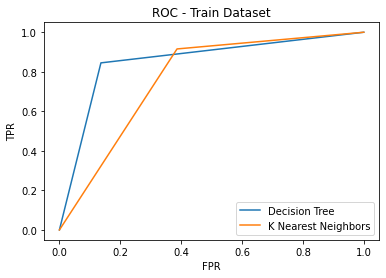

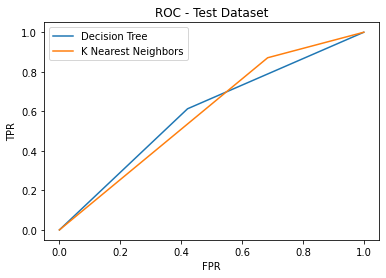

In [58]:


#codificaçao da classe
enc=preprocessing.LabelEncoder()
df['Class']=enc.fit_transform(df['Class'])

#normalizar os dados
norm_df=(df[atributos]-df[atributos].mean())/df[atributos].std()

#ÁRVORE DE DECISÃO
X=norm_df[atributos] #atributos
Y=df['Class'] #classe
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y) #divisão dos dados entre teste e treino
clf=DecisionTreeClassifier(max_leaf_nodes=5,criterion='gini',random_state=0)
clf.fit(X_train,Y_train)
Y_pred_X_train=clf.predict(X_train)
fpr_tree_train, tpr_tree_train, thresholds = metrics.roc_curve(Y_train, Y_pred_X_train)

Y_pred_X_test=clf.predict(X_test)
fpr_tree_test, tpr_tree_test, thresholds = metrics.roc_curve(Y_test, Y_pred_X_test)

#VIZINHOS MAIS PRÓXIMOS
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,Y_train)
Y_pred_X_train=clf.predict(X_train)
fpr_neighbors_train, tpr_neighbors_train, thresholds = metrics.roc_curve(Y_train, Y_pred_X_train)

Y_pred_X_test=clf.predict(X_test)
fpr_neighbors_test, tpr_neighbors_test, thresholds = metrics.roc_curve(Y_test, Y_pred_X_test)


plt.plot(fpr_tree_train,tpr_tree_train,label='Decision Tree')
plt.plot(fpr_neighbors_train,tpr_neighbors_train,label='K Nearest Neighbors')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC - Train Dataset')
plt.show()

plt.plot(fpr_tree_test,tpr_tree_test,label='Decision Tree')
plt.plot(fpr_neighbors_test,tpr_neighbors_test,label='K Nearest Neighbors')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC - Test Dataset')
plt.show()